## A equipe da [Udacity](https://udacity.com) disponibilizou informações sobre uma parte dos passageiros à bordo do RMS Titanic no dia daquela tragédia. Esse _dataset_ que contém informações reais vem sendo utilizado em diversos estudos de caso, além de servir de base para aprendizado de Ciência de Dados, Estatística e Machine Learning.

## O arquivo **titanic.data** contém informações reais sobre os passageiros organizadas da seguinte forma:

- Survived (Sobreviveu): 0 = Não, 1 = Sim
- Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
- Sex (Sexo): Sexo do passageiro
- Age (Idade): Idade em anos
- Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
- Parch: Quantidade de pais / crianças a bordo do Titanic
- Ticket (Bilhete): Número do bilhete de embarque
- Fare (Tarifa): Tarifa paga pelo Passageiro
- Cabin (Cabine): Número de cabine
- Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

## O objetivo deste estudo é obter algumas informações estatísticas sobre a tragédia e realizar alguns _insights_ a respeito dos tripulantes e das circunstâncias do acidente.

## Efetue a carga do arquivo através da biblioteca _Pandas_ e a partir do _DataFrame_ gerado, efetue as operações necessárias para responder as questões.


## Importando o DataSet

### 1 - Efetuar a leitura do dataset através do Pandas, gerando um DataFrame de nome tit, levando-se em consideração que o arquivo encontra-se na mesma pasta do notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tit = pd.read_csv('/content/titanic.data')
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Conhecendo o DataSet

### 2 - Quantas linhas e colunas tem o dataset? Quais os tipos das colunas?

In [3]:
# linhas
tit.shape
# Dataset tem 891 linhas

(891, 12)

In [4]:
# colunas
tit.shape
# Dataset tem 12 colunas

(891, 12)

In [5]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3 - Mostre os dados dos dez primeiros e 8 últimos registros do dataset.

In [6]:
# 10 primeiros registros
tit.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# 8 ultimos registros
tit.tail(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


### 4 - Cálculos envolvendo colunas numéricas com dados faltantes podem sofrer impacto. É possível afirmar se há dados faltantes no dataset? Caso positivo, quais e quantos seriam esses dados? Preencha os dados faltantes de forma que não influenciem em operações futuras.

In [8]:
# Numero de dados faltantes percentuais do DataSet
NaN_total = (1 - (tit.count() / len(tit)))*100
NaN_total.round(decimals= 1)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

Text(0.5, 1.0, 'Numero de dados faltantes em cada categoria')

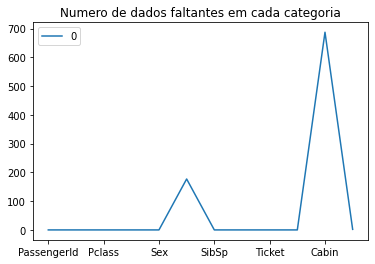

In [9]:
pd.DataFrame(tit.isnull().sum()).plot.line().set_title('Numero de dados faltantes em cada categoria')

Text(0.5, 1.0, 'Dados faltantes heatmap')

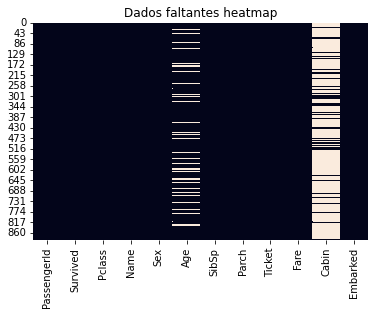

In [10]:
sns.heatmap(tit.isnull(), cbar = False).set_title("Dados faltantes heatmap")

É possível afirmar se há dados faltantes no dataset? Sim confirmado dados faltantes

Caso positivo, quais e quantos seriam esses dados?
*  Age            19.9%
*  Cabin          77.1%
*  Embarked        0.2%

## 4.1 Valores faltantes coluna Age

In [11]:
titCleanNan = tit.copy()

In [12]:
# A media geral pode ser usada, porém todas as idades faltantes seria 30 anos, assim poderiamos estar influenciando negativamente os calculos
round(titCleanNan['Age'].mean())

30

In [13]:
# Penso que idade por Class de cabine e sexo poderia mitigar os desvios para calculos futuros
titPclass = titCleanNan.groupby([titCleanNan['Pclass'], titCleanNan['Sex']])
titPclass.count()

PassengerId  Survived  Name  Age  ...  Ticket  Fare  Cabin  Embarked
Pclass Sex                                       ...                               
1      female           94        94    94   85  ...      94    94     81        92
       male            122       122   122  101  ...     122   122     95       122
2      female           76        76    76   74  ...      76    76     10        76
       male            108       108   108   99  ...     108   108      6       108
3      female          144       144   144  102  ...     144   144      6       144
       male            347       347   347  253  ...     347   347      6       347

[6 rows x 10 columns]

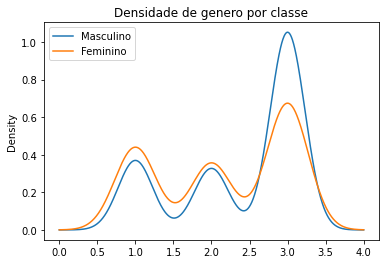

In [14]:
for x in ["male","female"]:
    titCleanNan['Pclass'][titCleanNan['Sex'] == x].plot(kind="kde")
plt.title("Densidade de genero por classe")
plt.legend(("Masculino","Feminino"))

In [15]:
# Medias de idade aplicadas ficaria variadas por Classe de cabine e sexo
# Cabine porque teriamos a variavel de idade de viajantes por uma possivel classe social da época
# Sexo porque a possivel idade media entre homens e mulheres da época
round(titPclass['Age'].mean())

Pclass  Sex   
1       female    35.0
        male      41.0
2       female    29.0
        male      31.0
3       female    22.0
        male      27.0
Name: Age, dtype: float64

In [16]:
titCleanNan['Age_fill'] = titCleanNan['Age'].groupby([titCleanNan['Pclass'], titCleanNan['Sex']]).apply(lambda x: x.fillna(x.mean()))

In [17]:
display(titCleanNan[titCleanNan['Age'].isnull()].head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fill
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,26.507589
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,30.740707
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,21.750000
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,26.507589
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,21.750000


In [18]:
# Numero de dados faltantes percentuais do DataSet após preencher coluna Age >> Age_fill 0% NaN
NaN_Clean = (1 - (titCleanNan.count() / len(titCleanNan)))*100
NaN_Clean.round(decimals= 1)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
Age_fill        0.0
dtype: float64

## Resultado da coluna Age_fill == Zero dados faltantes

Text(0.5, 1.0, 'Dados faltantes heatmap')

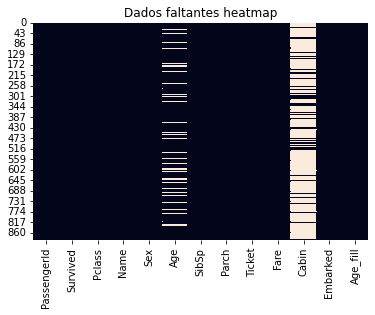

In [19]:
sns.heatmap(titCleanNan.isnull(), cbar = False).set_title("Dados faltantes heatmap")

## 4.2 Valores faltantes coluna Embarked

In [20]:
titEmbarked = titCleanNan.groupby(titCleanNan['Embarked'])
titEmbarked.count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_fill
Embarked,,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69,168
Q,77,77,77,77,77,28,77,77,77,77,4,77
S,644,644,644,644,644,554,644,644,644,644,129,644


Text(0.5, 1.0, 'Porto de origem')

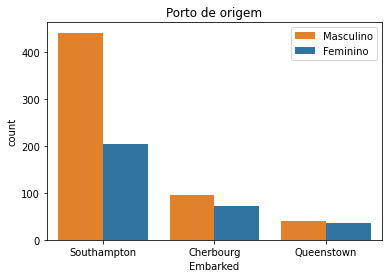

In [21]:
p = sns.countplot(x = titCleanNan['Embarked'], hue= 'Sex', data = titCleanNan, palette=['C1', 'C0'])
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["Masculino", "Feminino"])
p.set_title("Porto de origem")

In [22]:
display(titCleanNan[titCleanNan['Embarked'].isnull()].head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fill
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0


## Como existem 2 valores faltantes na coluna Emberked, optei por substituir com porto com maior frequencia Southampton

In [23]:
titCleanNan['Embarked'].fillna(titCleanNan['Embarked'].mode()[0], inplace = True)

In [24]:
# Numero de dados faltantes percentuais do DataSet após preencher coluna Age >> Age_fill 0% NaN
NaN_Clean = (1 - (titCleanNan.count() / len(titCleanNan)))*100
NaN_Clean.round(decimals= 1)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.0
Age_fill        0.0
dtype: float64

## 4.3 Valores faltantes na coluna Cabin

In [25]:
titCleanNan['Cabin'] = titCleanNan['Cabin'].fillna('deck')

## Para os valores que não especificaram a cabine, optei por colocar categoria deck para não perder as linhas de valores e cortar 77% das linhas

Text(0.5, 1.0, 'Dados faltantes heatmap')

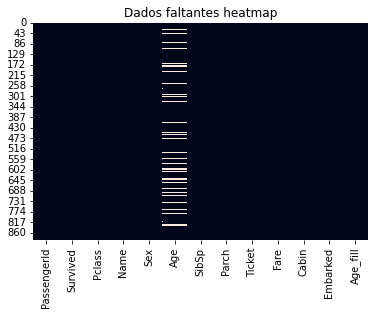

In [26]:
sns.heatmap(titCleanNan.isnull(), cbar = False).set_title("Dados faltantes heatmap")

In [27]:
titCleanNan.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,deck,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0


## Adequando o DataSet

### 4 - Uma vez que algumas colunas não serão utilizadas, eventualmente é melhor excluí-las para que não interfiram na análise. Assim, exclua do dataset as colunas Sibsp, Parch e Ticket.

In [28]:
titCleanNan.drop(['SibSp', 'Parch','Ticket', 'Age'], axis=1, inplace=True)
titCleanNan.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Fare,Cabin,Embarked,Age_fill
0,1,0,3,"Braund, Mr. Owen Harris",male,7.2500,deck,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833,C85,C,38.0


### 5 - Renomear as colunas restantes para a lingua portuguesa, utilizando os seguintes nomes de colunas: IdPassageiro, Sobreviveu, Classe, Nome, Sexo, Idade, Tarifa, Cabine e Embarque.

In [29]:
titCleanNan = titCleanNan.rename(columns={'PassengerId': 'IdPassageiro', 'Survived': 'Sobreviveu', 'Pclass': 'Classe', 'Name': 'Nome', 'Sex': 'Sexo',
                                          'Fare': 'Tarifa', 'Cabin':'Cabine', 'Embarked': 'Embarque', 'Age_fill': 'Idade'})
titCleanNan.head(2)

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Tarifa,Cabine,Embarque,Idade
0,1,0,3,"Braund, Mr. Owen Harris",male,7.2500,deck,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833,C85,C,38.0


### 6 - Alterar o conteudo da coluna Sobreviveu para:
- 0 => Não
- 1 => Sim

In [34]:
titCleanNan['Sobreviveu'].replace([1, 0], ['Sim', 'Nao'], inplace=True)

In [35]:
titCleanNan.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Tarifa,Cabine,Embarque,Idade
0,1,Nao,3,"Braund, Mr. Owen Harris",Homem,7.2500,deck,S,22.0
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mulher,71.2833,C85,C,38.0
2,3,Sim,3,"Heikkinen, Miss. Laina",Mulher,7.9250,deck,S,26.0
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mulher,53.1000,C123,S,35.0
4,5,Nao,3,"Allen, Mr. William Henry",Homem,8.0500,deck,S,35.0


### 7 - Alterar o conteudo da coluna Sexo para:
- female => Mulher
- male   => Homem

In [32]:
titCleanNan['Sexo'].replace(['female', 'male'], ['Mulher', 'Homem'], inplace=True)

In [33]:
titCleanNan.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Tarifa,Cabine,Embarque,Idade
0,1,0,3,"Braund, Mr. Owen Harris",Homem,7.2500,deck,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mulher,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",Mulher,7.9250,deck,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mulher,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",Homem,8.0500,deck,S,35.0


## Alguns números

### 8 - Quantas mulheres e quantos homems estavam à bordo, de acordo com o dataset?

Text(0.5, 1.0, 'Mulheres & Homens à bordo')

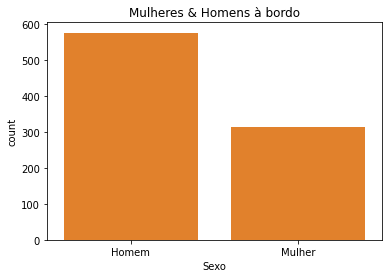

In [36]:
sexoPassageiro = sns.countplot(x = titCleanNan['Sexo'], data = titCleanNan, palette=['C1'])
sexoPassageiro.set_xticklabels(["Homem","Mulher"])
sexoPassageiro.set_title("Mulheres & Homens à bordo")

In [37]:
titSexo = titCleanNan.groupby(titCleanNan['Sexo'])
titSexo.count()

,IdPassageiro,Sobreviveu,Classe,Nome,Tarifa,Cabine,Embarque,Idade
Sexo,,,,,,,,
Homem,577,577,577,577,577,577,577,577
Mulher,314,314,314,314,314,314,314,314


## São 577 Homens e 314 Mulheres

### 9 - Quantos passageiros sobreviveram e quantos não sobreviveram?

Text(0.5, 1.0, 'Quantos sobreviveram ou não')

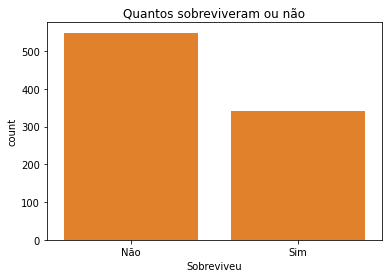

In [38]:
sobreviveuPassageiro = sns.countplot(x = titCleanNan['Sobreviveu'], data = titCleanNan, palette=['C1'])
sobreviveuPassageiro.set_xticklabels(["Não","Sim"])
sobreviveuPassageiro.set_title("Quantos sobreviveram ou não")

In [39]:
titSobreviveu = titCleanNan.groupby(titCleanNan['Sobreviveu'])
titSobreviveu.count()

,IdPassageiro,Classe,Nome,Sexo,Tarifa,Cabine,Embarque,Idade
Sobreviveu,,,,,,,,
Nao,549,549,549,549,549,549,549,549
Sim,342,342,342,342,342,342,342,342


## 549 não sobreviveram e 342 sobreviventes

### 10 - Quantas mulheres não sobreviveram?

Text(0.5, 1.0, 'Quantos sobreviveram ou não')

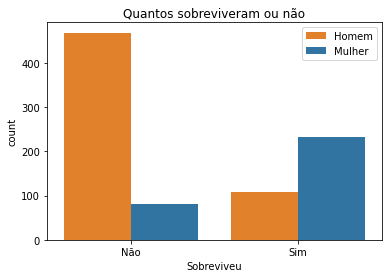

In [40]:
sobreviveuPassageiro = sns.countplot(x = titCleanNan['Sobreviveu'], hue='Sexo', data = titCleanNan, palette=['C1', 'C0'])
sobreviveuPassageiro.set_xticklabels(["Não","Sim"])
sobreviveuPassageiro.legend(labels = ["Homem", "Mulher"])
sobreviveuPassageiro.set_title("Quantos sobreviveram ou não")

In [41]:
titSobreviveuMulher = titCleanNan.groupby([titCleanNan['Sobreviveu'], titCleanNan['Sexo']])
titSobreviveuMulher.count()

IdPassageiro  Classe  Nome  Tarifa  Cabine  Embarque  Idade
Sobreviveu Sexo                                                               
Nao        Homem            468     468   468     468     468       468    468
           Mulher            81      81    81      81      81        81     81
Sim        Homem            109     109   109     109     109       109    109
           Mulher           233     233   233     233     233       233    233

## 81 mulheres não sobreviveram

### 11 - Proporcionalmente, sobreviveram mais homens ou mais mulheres? Cite as proporções.

In [42]:
SobreviveuSexo = (titSobreviveuMulher.count() / len(titCleanNan))*100
SobreviveuSexo.round(decimals= 1)

IdPassageiro  Classe  Nome  Tarifa  Cabine  Embarque  Idade
Sobreviveu Sexo                                                               
Nao        Homem           52.5    52.5  52.5    52.5    52.5      52.5   52.5
           Mulher           9.1     9.1   9.1     9.1     9.1       9.1    9.1
Sim        Homem           12.2    12.2  12.2    12.2    12.2      12.2   12.2
           Mulher          26.2    26.2  26.2    26.2    26.2      26.2   26.2

## Sobreviveram mais mulheres com 26,2% do total de passageiros

### 12 - Levando-se em consideração a idade dos passageiros, qual a idade e quantidade de pessoas com o maior número de mortos?

In [43]:
titIdadeSobreviveu = titCleanNan.groupby(['Idade', 'Sobreviveu'])

In [44]:
IdadeSobreviveu = titIdadeSobreviveu.size()

In [45]:
round(IdadeSobreviveu.unstack(level=0))

Idade,0.420000,0.670000,0.750000,0.830000,0.920000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,14.500000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,20.500000,21.000000,21.750000,22.000000,23.000000,23.500000,24.000000,24.500000,25.000000,26.000000,26.507589,27.000000,28.000000,28.500000,...,36.500000,37.000000,38.000000,39.000000,40.000000,40.500000,41.000000,41.281386,42.000000,43.000000,44.000000,45.000000,45.500000,46.000000,47.000000,48.000000,49.000000,50.000000,51.000000,52.000000,53.000000,54.000000,55.000000,55.500000,56.000000,57.000000,58.000000,59.000000,60.000000,61.000000,62.000000,63.000000,64.000000,65.000000,66.000000,70.000000,70.500000,71.000000,74.000000,80.000000
Sobreviveu,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Nao,NaN,NaN,NaN,NaN,NaN,2.0,7.0,1.0,3.0,NaN,1.0,2.0,2.0,6.0,2.0,3.0,NaN,NaN,3.0,1.0,1.0,11.0,7.0,17.0,16.0,12.0,1.0,19.0,17.0,16.0,10.0,1.0,15.0,1.0,17.0,12.0,85.0,7.0,18.0,2.0,...,1.0,5.0,6.0,9.0,7.0,2.0,4.0,16.0,7.0,4.0,6.0,7.0,2.0,3.0,8.0,3.0,2.0,5.0,5.0,3.0,NaN,5.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,NaN,2.0,3.0,1.0,2.0,1.0,2.0,1.0,NaN
Sim,1.0,1.0,2.0,2.0,1.0,5.0,3.0,5.0,7.0,4.0,2.0,1.0,2.0,2.0,NaN,1.0,1.0,2.0,3.0,NaN,4.0,6.0,6.0,9.0,9.0,3.0,NaN,5.0,25.0,11.0,5.0,NaN,15.0,NaN,6.0,6.0,9.0,11.0,7.0,NaN,...,NaN,1.0,5.0,5.0,6.0,NaN,2.0,5.0,6.0,1.0,3.0,5.0,NaN,NaN,1.0,6.0,4.0,5.0,2.0,3.0,1.0,3.0,1.0,NaN,2.0,NaN,3.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## Entre 26 e 27 aos são as maiores quantidades de mortos

### 13 - Qual a média de idade dos homens sobreviventes?

In [46]:
round(titSobreviveuMulher['Idade'].agg('mean'))

Sobreviveu  Sexo  
Nao         Homem     31.0
            Mulher    24.0
Sim         Homem     28.0
            Mulher    28.0
Name: Idade, dtype: float64

## Média de idade é 28 anos

### 14 - Levando-se em consideração passageiros prioritários (mulheres e crianças de até 15 anos independente do sexo) qual a proporção de sobreviventes por sexo?

In [47]:
grupo_idade = []

for i in titCleanNan['Idade']:
  if i < 15:
    grupo_idade.append('crianca15')
  elif  i >=15 and i <= 23:
    grupo_idade.append('adolecente13_23')
  elif i >=24 and i <=30:
    grupo_idade.append('Adulto24_30')
  elif i >= 31 and i <=44:
    grupo_idade.append('Adulto31_44')
  else:
    grupo_idade.append('idoso44')

titCleanNan['grupo_idade'] = grupo_idade

In [48]:
SobreviveuMulherCrianca = titCleanNan.groupby(by=['grupo_idade', 'Sexo', 'Sobreviveu']).size()
SobreviveuMulherCrianca

grupo_idade      Sexo    Sobreviveu
Adulto24_30      Homem   Nao           170
                         Sim            29
                 Mulher  Nao            14
                         Sim            45
Adulto31_44      Homem   Nao           111
                         Sim            32
                 Mulher  Nao            12
                         Sim            63
adolecente13_23  Homem   Nao            95
                         Sim            11
                 Mulher  Nao            32
                         Sim            72
crianca15        Homem   Nao            18
                         Sim            21
                 Mulher  Nao            15
                         Sim            24
idoso44          Homem   Nao            74
                         Sim            16
                 Mulher  Nao             8
                         Sim            29
dtype: int64

In [49]:
SomaPrioritarios = 45 + 63 + 72 + 21 + 24 + 29
SomaPrioritarios

254

## Sobreviventes prioritarios são 254 Crianças até 15 anos e Mulheres

### 15 - Qual a quantidade de passageiros por classe?

Text(0.5, 1.0, 'Passageiros por classe')

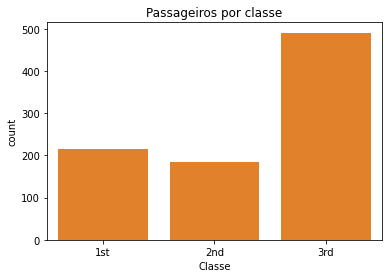

In [50]:
PassageiroClasse = sns.countplot(x = titCleanNan['Classe'], data = titCleanNan, palette=['C1'])
PassageiroClasse.set_xticklabels(["1st","2nd", '3rd'])
PassageiroClasse.set_title("Passageiros por classe")

In [51]:
titPassageirosClasse = titCleanNan.groupby(titCleanNan['Classe'])
titPassageirosClasse.count()

,IdPassageiro,Sobreviveu,Nome,Sexo,Tarifa,Cabine,Embarque,Idade,grupo_idade
Classe,,,,,,,,,
1,216,216,216,216,216,216,216,216,216
2,184,184,184,184,184,184,184,184,184
3,491,491,491,491,491,491,491,491,491


## São 216 na 1a classe , 184 na 2a classe e 491 na 3a

### 16 - Qual o percentual de sobreviventes por classe?

In [52]:
titSobreviveuClasse = titCleanNan.groupby([titCleanNan['Sobreviveu'], titCleanNan['Classe']])
titSobreviveuClasse.count()

IdPassageiro  Nome  Sexo  ...  Embarque  Idade  grupo_idade
Sobreviveu Classe                            ...                              
Nao        1                 80    80    80  ...        80     80           80
           2                 97    97    97  ...        97     97           97
           3                372   372   372  ...       372    372          372
Sim        1                136   136   136  ...       136    136          136
           2                 87    87    87  ...        87     87           87
           3                119   119   119  ...       119    119          119

[6 rows x 8 columns]

In [53]:
SobreviveuClasse = (titSobreviveuClasse.count() / len(titCleanNan))*100
SobreviveuClasse.round(decimals= 1)

IdPassageiro  Nome  Sexo  ...  Embarque  Idade  grupo_idade
Sobreviveu Classe                            ...                              
Nao        1                9.0   9.0   9.0  ...       9.0    9.0          9.0
           2               10.9  10.9  10.9  ...      10.9   10.9         10.9
           3               41.8  41.8  41.8  ...      41.8   41.8         41.8
Sim        1               15.3  15.3  15.3  ...      15.3   15.3         15.3
           2                9.8   9.8   9.8  ...       9.8    9.8          9.8
           3               13.4  13.4  13.4  ...      13.4   13.4         13.4

[6 rows x 8 columns]

## Os sobreviventes por classe em percentual
* 1a classe 15,3% do total de passageiros
* 2a classe 9,8%
* 3a classe 13,4%

### 17 - Crie um dataframe que demonstre a quantidade de sobreviventes e não sobreviventes, agrupados por sexo e classe.

In [54]:
titSobreviveuClasseSexo = titCleanNan.groupby([titCleanNan['Sobreviveu'], titCleanNan['Sexo'], titCleanNan['Classe']])
titSCS = pd.DataFrame(titSobreviveuClasseSexo.count())
titSCS

IdPassageiro  Nome  ...  Idade  grupo_idade
Sobreviveu Sexo   Classe                      ...                    
Nao        Homem  1                 77    77  ...     77           77
                  2                 91    91  ...     91           91
                  3                300   300  ...    300          300
           Mulher 1                  3     3  ...      3            3
                  2                  6     6  ...      6            6
                  3                 72    72  ...     72           72
Sim        Homem  1                 45    45  ...     45           45
                  2                 17    17  ...     17           17
                  3                 47    47  ...     47           47
           Mulher 1                 91    91  ...     91           91
                  2                 70    70  ...     70           70
                  3                 72    72  ...     72           72

[12 rows x 7 columns]

### 18 - Dos homens com idade entre 24 e 30 anos quantos da classe 3 sobreviveram? Quantos da classe 2 não sobreviveram?

In [55]:
SobreviveuClasseHomen = titCleanNan.groupby(['grupo_idade', 'Sexo', 'Classe', 'Sobreviveu'])
SobreviveuClasseHomen.count()

IdPassageiro  Nome  ...  Embarque  Idade
grupo_idade     Sexo   Classe Sobreviveu                      ...                 
Adulto24_30     Homem  1      Nao                    8     8  ...         8      8
                              Sim                    8     8  ...         8      8
                       2      Nao                   24    24  ...        24     24
                       3      Nao                  138   138  ...       138    138
                              Sim                   21    21  ...        21     21
                Mulher 1      Nao                    1     1  ...         1      1
                              Sim                   12    12  ...        12     12
                       2      Nao                    3     3  ...         3      3
                              Sim                   23    23  ...        23     23
                       3      Nao                   10    10  ...        10     10
                              Sim                   10    10  ...        10     10
Adulto31_44     Homem  1      Nao                   30    30  ...        30     30
                              Sim                   20    20  ...        20     20
                       2      Nao                   27    27  ...        27     27
                              Sim                    4     4  ...         4      4
                       3      Nao                   54    54  ...        54     54
                              Sim                    8     8  ...         8      8
                Mulher 1      Sim                   38    38  ...        38     38
                       2      Nao                    2     2  ...         2      2
                              Sim                   19    19  ...        19     19
                       3      Nao                   10    10  ...        10     10
                              Sim                    6     6  ...         6      6
adolecente13_23 Homem  1      Nao                    5     5  ...         5      5
                              Sim                    2     2  ...         2      2
                       2      Nao                   18    18  ...        18     18
                              Sim                    1     1  ...         1      1
                       3      Nao                   72    72  ...        72     72
                              Sim                    8     8  ...         8      8
                Mulher 1      Sim                   20    20  ...        20     20
                       2      Sim                   10    10  ...        10     10
                       3      Nao                   32    32  ...        32     32
                              Sim                   42    42  ...        42     42
crianca15       Homem  1      Sim                    3     3  ...         3      3
                       2      Sim                    9     9  ...         9      9
                       3      Nao                   18    18  ...        18     18
                              Sim                    9     9  ...         9      9
                Mulher 1      Nao                    1     1  ...         1      1
                              Sim                    1     1  ...         1      1
                       2      Sim                   10    10  ...        10     10
                       3      Nao                   14    14  ...        14     14
                              Sim                   13    13  ...        13     13
idoso44         Homem  1      Nao                   34    34  ...        34     34
                              Sim                   12    12  ...        12     12
                       2      Nao                   22    22  ...        22     22
                              Sim                    3     3  ...         3      3
                       3      Nao                   18    18  ...        18     18
                              Sim                    1    

## Homens com idade entre 24 e 30 anos 

## Quantos da classe 3 sobreviveram? 21

## Quantos da classe 2 não sobreviveram? 24

### 19 - Represente graficamente duas comparações que preferir e analise/descreva quais as conclusões obtidas.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


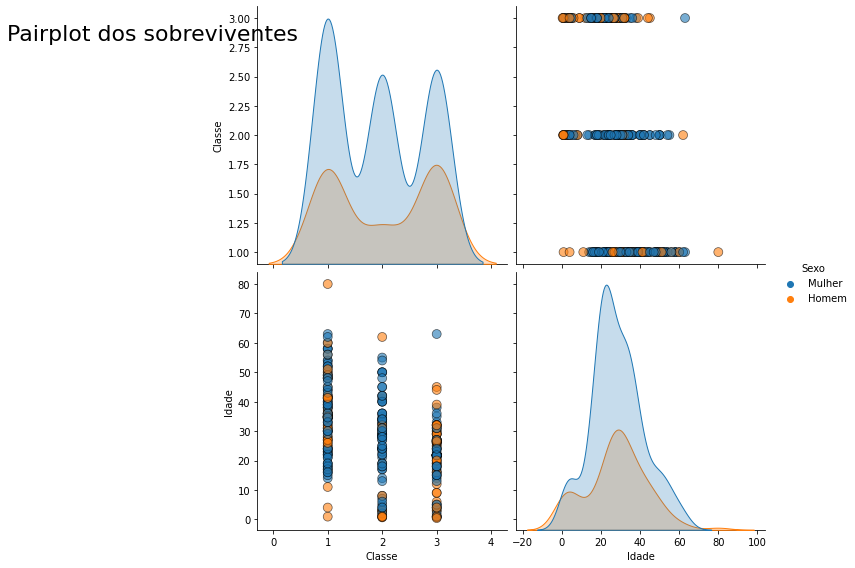

In [56]:
sns.pairplot(titCleanNan[titCleanNan['Sobreviveu']=='Sim'],
             vars = ['Classe', 'Idade'],
             hue = 'Sexo', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

plt.suptitle('Pairplot dos sobreviventes', size= 22, x= -0.3, y=.95, horizontalalignment='left', verticalalignment='top');

## Mulheres sobreviventes são mais numerosas que os homens , nas classes, destaquando a 1a classe e também idade entre 20 e 40 anos 